In [1]:
!pip3 install qiskit
!pip3 install qiskit_aer

In [1]:
#Note: this version still uses measurement and classical bits; need to eliminate dependence on these in future versions


import matplotlib.pyplot as plt
import numpy as np
import math
import qiskit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [2]:
#Need to check these condition for solution to sudoku puzzle
checks = [[0,1],
         [0,2],
         [1,3],
         [2,3]]

In [3]:
#Define our gate
def XORGate(Circuit, input1, input2, output):
    Circuit.cx(input1, output)
    Circuit.cx(input2, output)
#Define our oracle    
def oracle(Circuit, checks, check_qubits):
    j = 0
    for i in checks:
        XORGate(Circuit, i[0], i[1], check_qubits[j])
        j += 1

    # Flip 'output' bit if all checks passed
    Circuit.mcx(check_qubits, output_qubit)

    # Uncompute
    j = 0
    for i in checks:
        XORGate(Circuit, i[0], i[1], check_qubits[j])
        j += 1

In [4]:
#Define diffuser
def diffuser(n):
    Circuit = QuantumCircuit(n)
    # H-gates
    for qubit in range(n):
        Circuit.h(qubit)
    # X-gates
    for qubit in range(n):
        Circuit.x(qubit)
    # Multi-controlled-X gate
    Circuit.h(n-1)
    Circuit.mcx(list(range(n-1)), n-1)
    Circuit.h(n-1)
    # |11..1> -> |00..0>
    for qubit in range(n):
        Circuit.x(qubit)
    # |00..0> -> |s>
    for qubit in range(n):
        Circuit.h(qubit)
        
    U = Circuit.to_gate()
    U.name = "U"
    return U

In [5]:
              
qubits = QuantumRegister(4, name='q')
check_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
classbits = ClassicalRegister(4, name='classbits')


Circuit = QuantumCircuit(qubits, check_qubits, output_qubit, classbits)

# Initialize state
Circuit.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
Circuit.h(qubits)
Circuit.barrier()  # for visual separation

# Oracle once
oracle(Circuit, checks, check_qubits)
Circuit.barrier()  # for visual separation
# Apply our diffuser
Circuit.append(diffuser(4), [0,1,2,3])

# ## Apply Oracle again
# oracle(Circuit, checks, check_qubits)
# Circuit.barrier()  # for visual separation
# Circuit.append(diffuser(4), [0,1,2,3])

# Measure (?)
Circuit.measure(qubits, classbits)

Circuit.draw(fold=-1)

┌───┐               ░                                                                                       ░ ┌────┐┌─┐         
        q_0: ─────────────┤ H ├───────────────░───■─────────■──────────────────────────────────■─────────■────────────────────────────░─┤0   ├┤M├─────────
                          ├───┤               ░   │         │                                  │         │                            ░ │    │└╥┘┌─┐      
        q_1: ─────────────┤ H ├───────────────░───┼────■────┼─────────■────────────────────────┼────■────┼─────────■──────────────────░─┤1   ├─╫─┤M├──────
                          ├───┤               ░   │    │    │         │                        │    │    │         │                  ░ │  U │ ║ └╥┘┌─┐   
        q_2: ─────────────┤ H ├───────────────░───┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■────────░─┤2   ├─╫──╫─┤M├───
                          ├───┤               ░   │    │    │    │    │         │              │    │    │    │    │         │        ░ │    │ ║  ║ └╥┘┌─┐
        q_3: ─────────────┤ H ├───────────────░───┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■───░─┤3   ├─╫──╫──╫─┤M├
                          └───┘               ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ └────┘ ║  ║  ║ └╥┘
        c_0: ─────────────────────────────────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░────────╫──╫──╫──╫─
                                              ░ └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░        ║  ║  ║  ║ 
        c_1: ─────────────────────────────────░───────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼───░────────╫──╫──╫──╫─
                                              ░           └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░        ║  ║  ║  ║ 
        c_2: ─────────────────────────────────░─────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░────────╫──╫──╫──╫─
                                              ░                     └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░        ║  ║  ║  ║ 
        c_3: ─────────────────────────────────░───────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├─░────────╫──╫──╫──╫─
             ┌──────────────────────────────┐ ░                               └───┘└───┘┌─┴─┐                              └───┘└───┘ ░        ║  ║  ║  ║ 
        out: ┤ Initialize(0.70711,-0.70711) ├─░─────────────────────────────────────────┤ X ├─────────────────────────────────────────░────────╫──╫──╫──╫─
             └──────────────────────────────┘ ░                                         └───┘                                         ░        ║  ║  ║  ║ 
classbits: 4/══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                                                                               0  1  2  3

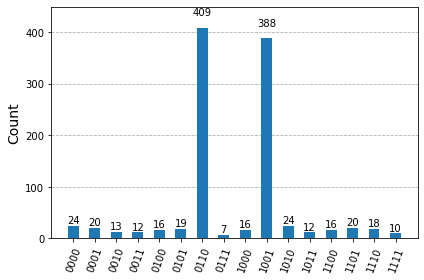

In [6]:
# Plot results
sim = Aer.get_backend('qasm_simulator')
simulator = Aer.get_backend('qasm_simulator')
transpiled_Circuit = transpile(Circuit, simulator)
result = sim.run(transpiled_Circuit).result()
plot_histogram(result.get_counts())